In [1]:
import pandas as pd
import numpy as np
import pickle
import statsmodels.api as sm

import matplotlib.pyplot as plt
plt.style.use('seaborn-ticks')
%matplotlib inline

pd.set_option("display.max_columns",101)

import gc
import math

In [3]:
medical = pd.read_pickle("data/medical.p")
print(medical.UCURNINS.unique())
medical["UCURNINS"] = (medical.UCURNINS=="Yes").astype(int)
print(medical.UCURNINS.unique())
levCols = ["UMARSTAT", "USATMED", "URELATE",
                      "REGION", "FHOSP", "UIMMSTAT",
                      "U_FTPT", "UBRACE", "UEDUC3",
                      "GENDER"]

numCols = ["FDENT", "FEMER", "FDOCT", "UAGE",
                     "U_WKSLY", "U_USHRS", "U_HRSLY",
                     "HOTHVAL", "HRETVAL", "HSSVAL", "HWSVAL"]
# Binaryzacja zmiennych nominalnych
dummLev = pd.get_dummies(medical[levCols], drop_first=True)
dummLev.shape
medical2 = pd.concat([medical[numCols], dummLev], axis=1)
print(medical.shape, math.sqrt(medical.shape[0]))

['Yes' 'No']
[1 0]
(35072, 29) 187.275198571514


In [7]:
medical.head()
medical2.head()

,FDENT,FEMER,FDOCT,UAGE,U_WKSLY,U_USHRS,U_HRSLY,HOTHVAL,HRETVAL,HSSVAL,HWSVAL,USATMED,URELATE,UEDUC3,"UMARSTAT_Married, do not live together",UMARSTAT_Married_live together,UMARSTAT_Never married,UMARSTAT_Partnership,UMARSTAT_Separated,UMARSTAT_Unknown,UMARSTAT_Widowed,REGION_Northeast,REGION_South,REGION_West,FHOSP_Yes,"UIMMSTAT_Foreign-born, non-citizen",UIMMSTAT_US-born citizen,U_FTPT_Part-time,UBRACE_Asian/Pacific Islander,UBRACE_Black,UBRACE_White,GENDER_Male
0,0,0,0,22,52,40,40,0,0,0,0,4,2,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,2,0,0,30,52,40,40,5950,0,0,31468,4,2,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,1,0,33,52,30,30,11340,0,4920,24700,4,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1
3,0,0,1,41,43,25,40,39002,0,0,60000,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0
4,2,0,0,34,52,40,40,4200,0,0,55280,4,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1


Lets see the crosstabulation for all nominal variables. We normalize them by the number of observations to see the values in percentages.

In [6]:
for var in levCols:
    display(((pd.crosstab(medical["UCURNINS"], medical[var], margins=True)/medical.shape[0])*100).round(1))

UMARSTAT,Divorced,"Married, do not live together",Married_live together,Never married,Partnership,Separated,Unknown,Widowed,All
UCURNINS,,,,,,,,,
0,9.5,0.5,54.8,14.8,2.4,2.2,0.1,1.3,85.6
1,2.0,0.3,5.7,4.1,1.3,0.7,0.0,0.2,14.4
All,11.5,0.8,60.6,18.9,3.7,2.9,0.1,1.5,100.0


USATMED,0,1,2,3,4,All
UCURNINS,,,,,,
0,2.1,5.6,1.3,30.7,45.9,85.6
1,1.0,1.5,1.2,5.3,5.4,14.4
All,3.1,7.0,2.5,36.0,51.3,100.0


URELATE,0,1,2,3,4,5,All
UCURNINS,,,,,,,
0,9.7,18.3,18.9,23.1,10.2,5.3,85.6
1,2.6,2.8,3.0,2.8,1.7,1.5,14.4
All,12.2,21.1,22.0,25.9,12.0,6.9,100.0


REGION,Midwest,Northeast,South,West,All
UCURNINS,,,,,
0,28.9,18.2,19.9,18.5,85.6
1,3.1,2.1,5.2,4.0,14.4
All,32.1,20.4,25.1,22.5,100.0


FHOSP,No,Yes,All
UCURNINS,,,
0,78.3,7.2,85.6
1,13.6,0.8,14.4
All,91.9,8.1,100.0


UIMMSTAT,"Foreign-born, naturalized US citizen","Foreign-born, non-citizen",US-born citizen,All
UCURNINS,,,,
0,3.9,4.1,77.6,85.6
1,0.8,3.2,10.5,14.4
All,4.7,7.2,88.1,100.0


U_FTPT,Full-time,Part-time,All
UCURNINS,,,
0,70.9,14.6,85.6
1,10.9,3.5,14.4
All,81.8,18.2,100.0


UBRACE,Amer Indian/Native American/Aleutian or Eskimo,Asian/Pacific Islander,Black,White,All
UCURNINS,,,,,
0,1.0,2.5,8.7,73.4,85.6
1,0.4,0.3,2.1,11.6,14.4
All,1.4,2.9,10.8,85.0,100.0


UEDUC3,0,1,2,All
UCURNINS,,,,
0,6.8,50.9,27.9,85.6
1,4.2,8.7,1.5,14.4
All,11.0,59.6,29.4,100.0


GENDER,Female,Male,All
UCURNINS,,,
0,43.7,41.9,85.6
1,6.6,7.8,14.4
All,50.4,49.6,100.0


In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
medical2 = medical.copy()
for col in levCols:
    medical2[col] = le.fit_transform(medical[col])


Lets calcualte some stats to see whichc varabiles are most valuable.

In [10]:
from scipy import stats
from sklearn import feature_selection

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

minfos=[]
pearsons = []
for var in levCols:
    print("\n", var)
    pearsons.append(stats.pearsonr(medical2["UCURNINS"], medical2[var]))
    print("Pearson", stats.pearsonr(medical2["UCURNINS"], medical2[var]))
    print("Mutual info", feature_selection.mutual_info_classif(medical2[var].values.reshape(-1,1),medical["UCURNINS"].values))
    minfos.append(feature_selection.mutual_info_classif(medical2[var].values.reshape(-1,1),medical["UCURNINS"].values))
    print("Chi2", feature_selection.chi2(medical2[var].values.reshape(-1,1),medical["UCURNINS"].values))
    print("Anova", feature_selection.f_classif(medical2[var].values.reshape(-1,1),medical["UCURNINS"].values))

imp = list(zip(minfos, levCols))
imp.sort(reverse=True)
imp


 UMARSTAT
Pearson (0.07490337618668176, 8.061762511117048e-45)
Mutual info [0.02141465]
Chi2 (array([127.68821002]), array([1.31336397e-29]))
Anova (array([197.8789], dtype=float32), array([8.e-45], dtype=float32))

 USATMED
Pearson (-0.15448012688677404, 3.1832522899448036e-186)
Mutual info [0.02026858]
Chi2 (array([266.25219451]), array([7.44299842e-60]))
Anova (array([857.369], dtype=float32), array([0.], dtype=float32))

 URELATE
Pearson (-0.014254534194610466, 0.007595043230342103)
Mutual info [0.00833706]
Chi2 (array([6.31763804]), array([0.01195428]))
Anova (array([7.1274576], dtype=float32), array([0.00759473], dtype=float32))

 REGION
Pearson (0.11268947981016836, 1.7806762236122152e-99)
Mutual info [0.00981489]
Chi2 (array([428.19613178]), array([4.01330071e-95]))
Anova (array([451.0842], dtype=float32), array([0.], dtype=float32))

 FHOSP
Pearson (-0.03343862046103535, 3.7582155563136514e-10)
Mutual info [0]
Chi2 (array([36.04664047]), array([1.92650646e-09]))
Anova (array(

[(array([0.03641531]), 'UEDUC3'),
 (array([0.02562256]), 'UIMMSTAT'),
 (array([0.02081173]), 'USATMED'),
 (array([0.02012234]), 'UMARSTAT'),
 (array([0.01341223]), 'REGION'),
 (array([0.00696092]), 'UBRACE'),
 (array([0.00564407]), 'URELATE'),
 (array([0.00387545]), 'U_FTPT'),
 (array([0.00063788]), 'GENDER'),
 (array([0]), 'FHOSP')]

In [11]:
imp = list(zip(pearsons, levCols))
imp.sort(reverse=True)
imp

[((0.11268947981016836, 1.7806762236122152e-99), 'REGION'),
 ((0.07490337618668176, 8.061762511117048e-45), 'UMARSTAT'),
 ((0.06785760817299576, 4.448103428762266e-37), 'U_FTPT'),
 ((0.03548832428288147, 2.9722338310150014e-11), 'GENDER'),
 ((-0.014254534194610466, 0.007595043230342103), 'URELATE'),
 ((-0.03343862046103535, 3.7582155563136514e-10), 'FHOSP'),
 ((-0.05204246566365812, 1.7993709426376654e-22), 'UBRACE'),
 ((-0.13639249892973843, 3.104334505557079e-145), 'UIMMSTAT'),
 ((-0.15448012688677404, 3.1832522899448036e-186), 'USATMED'),
 ((-0.2511872242294697, 0.0), 'UEDUC3')]

We have less optins for combination of discrete and continous variable. Lets see how the mutual information looks like.

In [12]:
from scipy import stats
from sklearn import feature_selection

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

minfos = []
for var in numCols:
    print(var, " Mutual info", feature_selection.mutual_info_classif(medical2[var].astype(float).values.reshape(-1,1),medical["UCURNINS"].astype(float).values))
    minfos.append(feature_selection.mutual_info_classif(medical2[var].astype(float).values.reshape(-1,1),medical["UCURNINS"].astype(float).values))
# We can sort recorded values
imp = list(zip(minfos, numCols))
imp.sort(reverse=True)
imp

FDENT  Mutual info [0.03478843]
FEMER  Mutual info [0.00315982]
FDOCT  Mutual info [0.03483641]
UAGE  Mutual info [0.0142436]
U_WKSLY  Mutual info [0.01451338]
U_USHRS  Mutual info [0.00826774]
U_HRSLY  Mutual info [0.00199478]
HOTHVAL  Mutual info [0]
HRETVAL  Mutual info [0]
HSSVAL  Mutual info [0]
HWSVAL  Mutual info [0]


[(array([0.03827217]), 'FDENT'),
 (array([0.03509805]), 'FDOCT'),
 (array([0.01187669]), 'U_WKSLY'),
 (array([0.01158153]), 'UAGE'),
 (array([0.0087608]), 'U_HRSLY'),
 (array([0.00317104]), 'HOTHVAL'),
 (array([0.00208598]), 'U_USHRS'),
 (array([0.00114032]), 'HRETVAL'),
 (array([0.00096723]), 'HWSVAL'),
 (array([0.00068739]), 'FEMER'),
 (array([0]), 'HSSVAL')]

We can use logistic regression for all variables (one variabel at a time). Then we can calculate any metric or statistic for regression. We chose AUC as a good reference point.

In [13]:
from sklearn import metrics
import statsmodels.api as sm


aucs=[]
for var in levCols:
    mod = sm.GLM.from_formula(formula="UCURNINS ~ "+var, data=medical, family=sm.families.Binomial())
    res = mod.fit()
    probs = res.predict()
    aucs.append(metrics.roc_auc_score(medical["UCURNINS"].values, probs))
    print(var, metrics.roc_auc_score(medical["UCURNINS"].values, probs))

for var in numCols:
    mod = sm.GLM.from_formula(formula="UCURNINS ~ "+var, data=medical, family=sm.families.Binomial())
    res = mod.fit()
    probs = res.predict()
    aucs.append(metrics.roc_auc_score(medical["UCURNINS"].values, probs))
    print(var, metrics.roc_auc_score(medical["UCURNINS"].values, probs))

UMARSTAT 0.6372515567948391
USATMED 0.6063510287809526
URELATE 0.5165251197687822
REGION 0.6013726061209655
FHOSP 0.512961810848779
UIMMSTAT 0.5934462633726708
U_FTPT 0.5372143757851929
UBRACE 0.5322917815436781
UEDUC3 0.6737774040138675
GENDER 0.5252370568128775
FDENT 0.6964487152576064
FEMER 0.5107957813622168
FDOCT 0.6868935102307081
UAGE 0.6181265687907294
U_WKSLY 0.5856560922320077
U_USHRS 0.5534668036783484
U_HRSLY 0.5497418742333913
HOTHVAL 0.4973190452053029
HRETVAL 0.5061463625158901
HSSVAL 0.5024899514109548
HWSVAL 0.49694189994742205


In [14]:
from sklearn import metrics
import statsmodels.api as sm


aucs=[]
for var in levCols:
    mod = sm.GLM.from_formula(formula="UCURNINS ~ "+var, data=medical, family=sm.families.Binomial())
    res = mod.fit()
    probs = res.predict()
    aucs.append(metrics.roc_auc_score(medical["UCURNINS"].values, probs))
    print(var, metrics.roc_auc_score(medical["UCURNINS"].values, probs))

for var in numCols:
    mod = sm.GLM.from_formula(formula="UCURNINS ~ "+var, data=medical, family=sm.families.Binomial())
    res = mod.fit()
    probs = res.predict()
    aucs.append(metrics.roc_auc_score(medical["UCURNINS"].values, probs))
    print(var, metrics.roc_auc_score(medical["UCURNINS"].values, probs))

imp = list(zip(aucs, levCols+numCols))
imp.sort(reverse=True)
imp

UMARSTAT 0.6372515567948391
USATMED 0.6063510287809526
URELATE 0.5165251197687822
REGION 0.6013726061209655
FHOSP 0.512961810848779
UIMMSTAT 0.5934462633726708
U_FTPT 0.5372143757851929
UBRACE 0.5322917815436781
UEDUC3 0.6737774040138675
GENDER 0.5252370568128775
FDENT 0.6964487152576064
FEMER 0.5107957813622168
FDOCT 0.6868935102307081
UAGE 0.6181265687907294
U_WKSLY 0.5856560922320077
U_USHRS 0.5534668036783484
U_HRSLY 0.5497418742333913
HOTHVAL 0.4973190452053029
HRETVAL 0.5061463625158901
HSSVAL 0.5024899514109548
HWSVAL 0.49694189994742205


[(0.6964487152576064, 'FDENT'),
 (0.6868935102307081, 'FDOCT'),
 (0.6737774040138675, 'UEDUC3'),
 (0.6372515567948391, 'UMARSTAT'),
 (0.6181265687907294, 'UAGE'),
 (0.6063510287809526, 'USATMED'),
 (0.6013726061209655, 'REGION'),
 (0.5934462633726708, 'UIMMSTAT'),
 (0.5856560922320077, 'U_WKSLY'),
 (0.5534668036783484, 'U_USHRS'),
 (0.5497418742333913, 'U_HRSLY'),
 (0.5372143757851929, 'U_FTPT'),
 (0.5322917815436781, 'UBRACE'),
 (0.5252370568128775, 'GENDER'),
 (0.5165251197687822, 'URELATE'),
 (0.512961810848779, 'FHOSP'),
 (0.5107957813622168, 'FEMER'),
 (0.5061463625158901, 'HRETVAL'),
 (0.5024899514109548, 'HSSVAL'),
 (0.4973190452053029, 'HOTHVAL'),
 (0.49694189994742205, 'HWSVAL')]

Now lets take a look at Spearman corellation for both numerical and categorical variables.

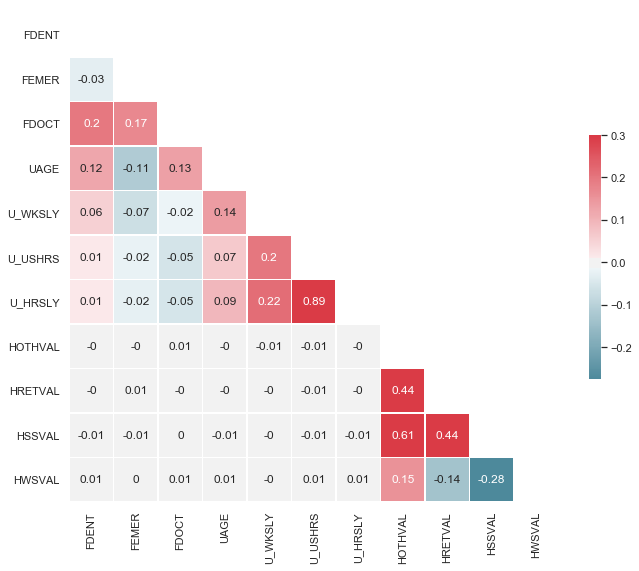

In [15]:
import seaborn as sns # just a conventional alias, don't know why
sns.set(style="white")

corr = medical[numCols].corr('spearman')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True) 
########################### jesli nie działa, to zakomentować tę linijkę, a poniżej dać cmap="RdBu" w sns.heatmap

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, annot = corr.round(2), linewidths=.5, cbar_kws={"shrink": .5})

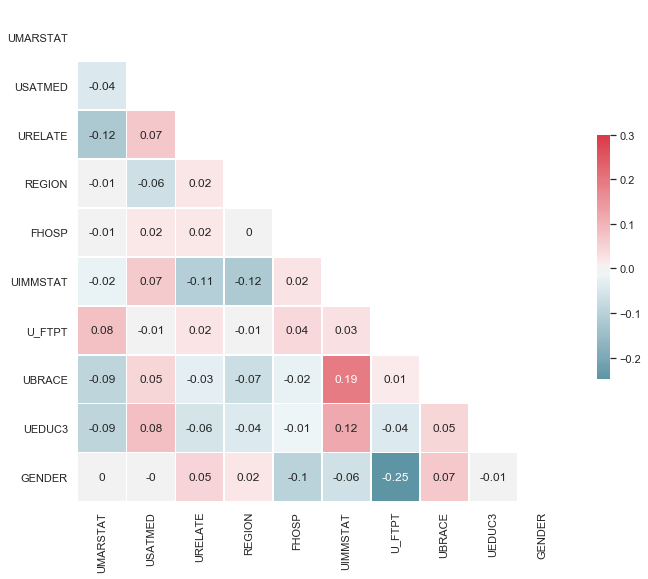

In [16]:
import seaborn as sns # just a conventional alias, don't know why
sns.set(style="white")

corr = medical2[levCols].corr('spearman')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, annot = corr.round(2), linewidths=.5, cbar_kws={"shrink": .5})

In [20]:
features = numCols + levCols
# Binaryzacja zmiennych nominalnych
dummLev = pd.get_dummies(medical[levCols], drop_first=True)
dummLev.shape
medical2 = pd.concat([medical[numCols], dummLev], axis=1)
medical2[numCols] = medical2[numCols].apply(lambda x: (x-x.mean())/x.std())
features = medical2.columns.tolist()

In [18]:
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn import neighbors
def runKNN(features=features):
    n_neighbors = 30
    kf = KFold(n_splits=5)
    sampleSize = 5000
    probs = []
    aucs = []
    clf = neighbors.KNeighborsClassifier(n_neighbors, n_jobs=-1, p=1)
    for train, test in kf.split(medical2.index.values):
        X = medical2.iloc[train][features].sample(sampleSize)
        clf.fit(X.values, medical.iloc[X.index.values]["UCURNINS"].values)
        prob = clf.predict_proba(medical2.iloc[test][features].values)
        aucs.append(metrics.roc_auc_score(medical.iloc[test]["UCURNINS"].values, prob[:,1]))
    print(np.mean(aucs), aucs)
    return np.mean(aucs)

In [19]:
# newFeatures = ['FDENT', 'FDOCT', 'UMARSTAT_Married_live together', 'UEDUC3', 'USATMED', 'U_FTPT_Part-time', 'UIMMSTAT_Foreign-born, non-citizen', 'U_WKSLY', 'UAGE']
newFeatures = []
tempFeatures = []

for k in range(10):
    aucs=[]
    featToTest = list(set(features) - set(newFeatures))
    for feat in featToTest:
        tempFeatures = newFeatures.copy()
        tempFeatures.append(feat)
        auc = runKNN(tempFeatures)
        aucs.append(auc)
        print(feat, tempFeatures, auc)
    imp = list(zip(aucs, featToTest))
    imp.sort(reverse=True)
    print(imp[0:5])
    print("##############")
    print("Selecting:", imp[0][1])
    newFeatures.append(imp[0][1])
    print("Current selection:", newFeatures)
    print("##############")

0.5975726986094657 [0.6122094404535423, 0.5, 0.6180663388543823, 0.6180903143100381, 0.6394973994293659]
UMARSTAT_Married_live together ['UMARSTAT_Married_live together'] 0.5975726986094657


KeyboardInterrupt: 

## Excercises

In [ ]:
# Exercise 8.1
# Import the data from data/churn.csv and 
# check the existence of zero-variance and
# near-zero variabce variables

In [ ]:
# Exercise 8.2
# Check correlations between variables

In [ ]:
# Exercise 8.3
# Starting from some general model try
# automatic selection of variables
# using different filtering approaches
# (supervised and unsupervised)

In [ ]:
# Exercise 8.4
# Run logistic regression with backward
# elimination of variables. Save the final model.

In [ ]:
# Exercise 8.5
# Compare the predictive accuracy 
# on the test sample for logistic regression 
# models including:
# - all sensible variables (w/o redundant and
#   irrelevant features)
# - variables left after backward elimination
# - top 3 categorical and top 3 continuous variables